<a href="https://colab.research.google.com/github/aitorTD/churn_neural_network/blob/main/churn_Aitor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# first neural network with keras tutorial
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Básico

In [ ]:
# load the dataset
# dataset = loadtxt('churn.csv', delimiter=',')
dataset = pd.read_csv('churn.csv')
# split into input (X) and output (y) variables
X = dataset.drop('Churn', axis=1).values
y = dataset['Churn'].values
le = preprocessing.LabelEncoder()
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in dataset.columns:
    if dataset[column].dtype == 'object':
        dataset[column] = le.fit_transform(dataset[column].values)

for column in dataset.columns:
    if dataset[column].dtype != 'object':
        dataset[column] = dataset[column].astype('float32')

X = dataset.drop(columns=['Churn']).values
y = dataset['Churn'].values

In [ ]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.850000,2505.0,0.0
1,3962.0,1.0,0.0,0.0,0.0,34.0,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.950001,1466.0,0.0
2,2564.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.849998,157.0,1.0
3,5535.0,1.0,0.0,0.0,0.0,45.0,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.299999,1400.0,0.0
4,6511.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.699997,925.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0.0,1.0,1.0,24.0,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.800003,1597.0,0.0
7039,1525.0,0.0,0.0,1.0,1.0,72.0,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.199997,5698.0,0.0
7040,3367.0,0.0,0.0,1.0,1.0,11.0,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.600000,2994.0,0.0
7041,5934.0,1.0,1.0,1.0,0.0,4.0,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.400002,2660.0,1.0


In [ ]:
# define the keras model
#iniciadores para relu: glorot
#iniciadores para sigmoid: he
model = Sequential()
# model.add(Dense(12, input_shape=(20,), activation='relu'))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(1, kernel_initializer="he_uniform", activation='sigmoid'))

# Accuracy: 80.55
model.add(Dense(64, input_shape=(20,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, kernel_initializer="he_uniform", activation='sigmoid'))

# Accuracy: 79.81
# model.add(Dense(64, input_shape=(20,), activation='elu'))
# model.add(Dense(32, activation='elu'))
# model.add(Dense(1, kernel_initializer="he_uniform", activation='sigmoid'))

# Accuracy: 79.34
# model.add(Dense(64, input_shape=(20,), activation='selu'))
# model.add(Dense(32, activation='selu'))
# model.add(Dense(1, kernel_initializer="he_uniform", activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_117 (Dense)           (None, 64)                1344      
                                                                 
 dense_118 (Dense)           (None, 32)                2080      
                                                                 
 dense_119 (Dense)           (None, 1)                 33        
                                                                 
Total params: 3,457
Trainable params: 3,457
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.optimizers import Adam
# compile the keras model
learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
history = model.fit(X,y, epochs=500, batch_size=768)

Epoch 1/500
10/10 [==============================] - 1s 3ms/step - loss: 189.0050 - accuracy: 0.6249
Epoch 2/500
10/10 [==============================] - 0s 5ms/step - loss: 64.9321 - accuracy: 0.6598
Epoch 3/500
10/10 [==============================] - 0s 3ms/step - loss: 21.4808 - accuracy: 0.5904
Epoch 4/500
10/10 [==============================] - 0s 4ms/step - loss: 15.2616 - accuracy: 0.6470
Epoch 5/500
10/10 [==============================] - 0s 5ms/step - loss: 11.5608 - accuracy: 0.6254
Epoch 6/500
10/10 [==============================] - 0s 4ms/step - loss: 8.7814 - accuracy: 0.6253
Epoch 7/500
10/10 [==============================] - 0s 4ms/step - loss: 4.2299 - accuracy: 0.6276
Epoch 8/500
10/10 [==============================] - 0s 4ms/step - loss: 4.8576 - accuracy: 0.6415
Epoch 9/500
10/10 [==============================] - 0s 4ms/step - loss: 5.5190 - accuracy: 0.6378
Epoch 10/500
10/10 [==============================] - 0s 3ms/step - loss: 4.7660 - accuracy: 0.6597
Epo

In [ ]:
# evaluate the keras model
loss,accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

221/221 [==============================] - 1s 2ms/step - loss: 0.4331 - accuracy: 0.7882
Accuracy: 78.82


In [ ]:
model.history

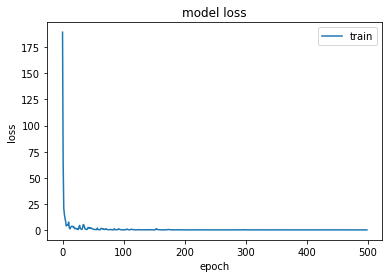

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train"], loc="upper right")
plt.show()

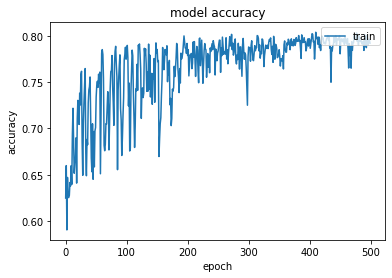

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train"], loc="upper right")
plt.show()

# Doble salida

In [ ]:
dataset = pd.read_csv('churn.csv')

In [ ]:
target_dummies = pd.get_dummies(dataset['Churn'], prefix='target')
dataset = pd.concat([dataset, target_dummies], axis=1)

In [ ]:
# dataset

In [ ]:
le = preprocessing.LabelEncoder()
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in dataset.columns:
    if dataset[column].dtype == 'object':
        dataset[column] = le.fit_transform(dataset[column].values)

for column in dataset.columns:
    if dataset[column].dtype != 'object':
        dataset[column] = dataset[column].astype('float32')

# X = dataset.drop(columns=['Churn']).values
# y = dataset['Churn'].values

X = dataset.drop(['Churn', 'target_No', 'target_Yes'], axis=1)
y = dataset[['target_No', 'target_Yes']]

In [ ]:
# dataset

In [ ]:
# define the keras model
#iniciadores para relu: glorot
#iniciadores para sigmoid: he
model = Sequential()
# model.add(Dense(12, input_shape=(20,), activation='relu'))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(2, kernel_initializer="he_uniform", activation='sigmoid'))

# Accuracy: 80.55
model.add(Dense(64, input_shape=(20,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, kernel_initializer="he_uniform", activation='sigmoid'))

# Accuracy: 79.81
# model.add(Dense(64, input_shape=(20,), activation='elu'))
# model.add(Dense(32, activation='elu'))
# model.add(Dense(1, kernel_initializer="he_uniform", activation='sigmoid'))

# Accuracy: 79.34
# model.add(Dense(64, input_shape=(20,), activation='selu'))
# model.add(Dense(32, activation='selu'))
# model.add(Dense(1, kernel_initializer="he_uniform", activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_162 (Dense)           (None, 64)                1344      
                                                                 
 dense_163 (Dense)           (None, 32)                2080      
                                                                 
 dense_164 (Dense)           (None, 2)                 66        
                                                                 
Total params: 3,490
Trainable params: 3,490
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.optimizers import Adam
# compile the keras model
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
# dataset

In [ ]:
history = model.fit(X,y, epochs=1000, batch_size=768,use_multiprocessing=True)

Epoch 1/1000
10/10 [==============================] - 1s 4ms/step - loss: 117.2472 - accuracy: 0.7346
Epoch 2/1000
10/10 [==============================] - 0s 4ms/step - loss: 24.1569 - accuracy: 0.4819
Epoch 3/1000
10/10 [==============================] - 0s 4ms/step - loss: 14.3788 - accuracy: 0.7209
Epoch 4/1000
10/10 [==============================] - 0s 4ms/step - loss: 7.0154 - accuracy: 0.6165
Epoch 5/1000
10/10 [==============================] - 0s 4ms/step - loss: 4.4849 - accuracy: 0.6357
Epoch 6/1000
10/10 [==============================] - 0s 4ms/step - loss: 2.8697 - accuracy: 0.6564
Epoch 7/1000
10/10 [==============================] - 0s 4ms/step - loss: 2.0718 - accuracy: 0.6886
Epoch 8/1000
10/10 [==============================] - 0s 4ms/step - loss: 1.7544 - accuracy: 0.6971
Epoch 9/1000
10/10 [==============================] - 0s 4ms/step - loss: 2.0475 - accuracy: 0.6699
Epoch 10/1000
10/10 [==============================] - 0s 4ms/step - loss: 1.4013 - accuracy: 0.

In [ ]:
# evaluate the keras model
loss,accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

221/221 [==============================] - 1s 3ms/step - loss: 0.5240 - accuracy: 0.7815
Accuracy: 78.15


In [ ]:
model.history

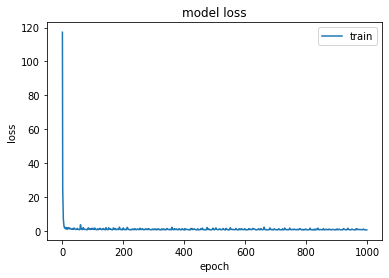

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train"], loc="upper right")
plt.show()

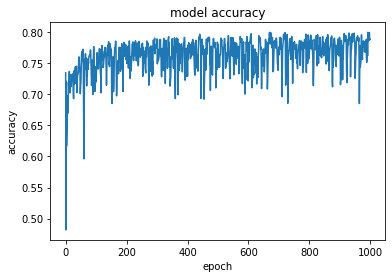

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
# plt.legend(["train"], loc="upper right")
plt.show()